# ID - 100633204

## EDA and Prediction

### Import Necessary libraries and load dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
Customer = pd.read_csv('DimCustomer.csv', encoding='latin-1')

In [4]:
Customer.head()

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance
0,11000,26,AW00011000,NaN,Jon,V,Yang,False,1966-04-08,M,...,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2005-07-22,1-2 Miles
1,11001,37,AW00011001,NaN,Eugene,L,Huang,False,1965-05-14,S,...,Professional,Profesional,Cadre,0,1,2243 W St.,NaN,1 (11) 500 555-0110,2005-07-18,0-1 Miles
2,11002,31,AW00011002,NaN,Ruben,NaN,Torres,False,1965-08-12,M,...,Professional,Profesional,Cadre,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,2005-07-10,2-5 Miles
3,11003,11,AW00011003,NaN,Christy,NaN,Zhu,False,1968-02-15,S,...,Professional,Profesional,Cadre,0,1,1825 Village Pl.,NaN,1 (11) 500 555-0162,2005-07-01,5-10 Miles
4,11004,19,AW00011004,NaN,Elizabeth,NaN,Johnson,False,1968-08-08,S,...,Professional,Profesional,Cadre,1,4,7553 Harness Circle,NaN,1 (11) 500 555-0131,2005-07-26,1-2 Miles


In [4]:
Customer.tail()

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance
18479,29479,209,AW00029479,NaN,Tommy,L,Tang,False,1958-07-04,M,...,Clerical,Administrativo,Employé,1,0,"111, rue Maillard",NaN,1 (11) 500 555-0136,2007-03-08,0-1 Miles
18480,29480,248,AW00029480,NaN,Nina,W,Raji,False,1960-11-10,S,...,Clerical,Administrativo,Employé,1,0,9 Katherine Drive,NaN,1 (11) 500 555-0146,2008-01-18,0-1 Miles
18481,29481,120,AW00029481,NaN,Ivan,NaN,Suri,False,1960-01-05,S,...,Clerical,Administrativo,Employé,0,0,Knaackstr 4,NaN,1 (11) 500 555-0144,2006-02-13,0-1 Miles
18482,29482,179,AW00029482,NaN,Clayton,NaN,Zhang,False,1959-03-05,M,...,Clerical,Administrativo,Employé,1,0,"1080, quai de Grenelle",NaN,1 (11) 500 555-0137,2007-03-22,0-1 Miles
18483,29483,217,AW00029483,NaN,Jésus,L,Navarro,False,1959-12-08,M,...,Clerical,Administrativo,Employé,1,0,"244, rue de la Centenaire",NaN,1 (11) 500 555-0141,2007-03-13,0-1 Miles


In [5]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerKey           18484 non-null  int64 
 1   GeographyKey          18484 non-null  int64 
 2   CustomerAlternateKey  18484 non-null  object
 3   Title                 101 non-null    object
 4   FirstName             18484 non-null  object
 5   MiddleName            10654 non-null  object
 6   LastName              18484 non-null  object
 7   NameStyle             18484 non-null  bool  
 8   BirthDate             18484 non-null  object
 9   MaritalStatus         18484 non-null  object
 10  Suffix                3 non-null      object
 11  Gender                18484 non-null  object
 12  EmailAddress          18484 non-null  object
 13  YearlyIncome          18484 non-null  int64 
 14  TotalChildren         18484 non-null  int64 
 15  NumberChildrenAtHome  18484 non-null

In [6]:
Customer.shape

(18484, 29)

In [7]:
Customer.isnull().sum()

CustomerKey                 0
GeographyKey                0
CustomerAlternateKey        0
Title                   18383
FirstName                   0
MiddleName               7830
LastName                    0
NameStyle                   0
BirthDate                   0
MaritalStatus               0
Suffix                  18481
Gender                      0
EmailAddress                0
YearlyIncome                0
TotalChildren               0
NumberChildrenAtHome        0
EnglishEducation            0
SpanishEducation            0
FrenchEducation             0
EnglishOccupation           0
SpanishOccupation           0
FrenchOccupation            0
HouseOwnerFlag              0
NumberCarsOwned             0
AddressLine1                0
AddressLine2            18172
Phone                       0
DateFirstPurchase           0
CommuteDistance             0
dtype: int64

<AxesSubplot: >

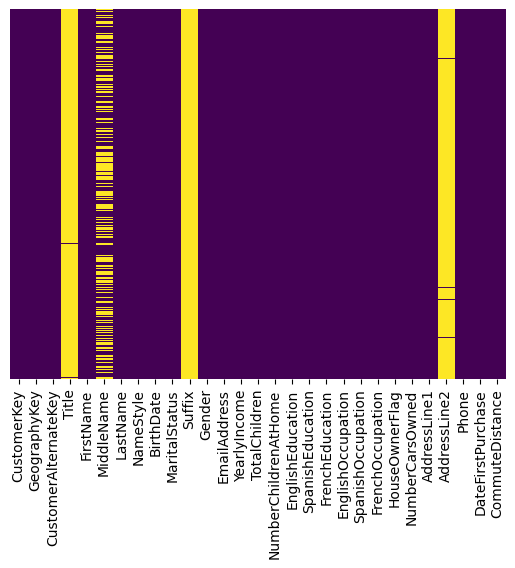

In [6]:
sns.heatmap(Customer.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Graphical representation of null values

In [7]:
Geography = pd.read_csv('DimGeography.csv', encoding = 'latin-1')

#### Loading 'DimGeography' dataset for merging

In [8]:
Geo_Country = Geography[['EnglishCountryRegionName','GeographyKey']]
Geo_Country.head()

,EnglishCountryRegionName,GeographyKey
0,Australia,1
1,Australia,2
2,Australia,3
3,Australia,4
4,Australia,5


In [9]:
Customer_final = pd.merge(Customer,Geo_Country, on = 'GeographyKey', how = 'left')
Customer_final.columns

Index(['CustomerKey', 'GeographyKey', 'CustomerAlternateKey', 'Title',
       'FirstName', 'MiddleName', 'LastName', 'NameStyle', 'BirthDate',
       'MaritalStatus', 'Suffix', 'Gender', 'EmailAddress', 'YearlyIncome',
       'TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation',
       'SpanishEducation', 'FrenchEducation', 'EnglishOccupation',
       'SpanishOccupation', 'FrenchOccupation', 'HouseOwnerFlag',
       'NumberCarsOwned', 'AddressLine1', 'AddressLine2', 'Phone',
       'DateFirstPurchase', 'CommuteDistance', 'EnglishCountryRegionName'],
      dtype='object')

In [10]:
Customer_final.head(5)

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,EnglishCountryRegionName
0,11000,26,AW00011000,NaN,Jon,V,Yang,False,1966-04-08,M,...,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2005-07-22,1-2 Miles,Australia
1,11001,37,AW00011001,NaN,Eugene,L,Huang,False,1965-05-14,S,...,Profesional,Cadre,0,1,2243 W St.,NaN,1 (11) 500 555-0110,2005-07-18,0-1 Miles,Australia
2,11002,31,AW00011002,NaN,Ruben,NaN,Torres,False,1965-08-12,M,...,Profesional,Cadre,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,2005-07-10,2-5 Miles,Australia
3,11003,11,AW00011003,NaN,Christy,NaN,Zhu,False,1968-02-15,S,...,Profesional,Cadre,0,1,1825 Village Pl.,NaN,1 (11) 500 555-0162,2005-07-01,5-10 Miles,Australia
4,11004,19,AW00011004,NaN,Elizabeth,NaN,Johnson,False,1968-08-08,S,...,Profesional,Cadre,1,4,7553 Harness Circle,NaN,1 (11) 500 555-0131,2005-07-26,1-2 Miles,Australia


# EDA

([<matplotlib.patches.Wedge at 0x2c96eff8940>,
 [Text(-1.0679843469854386, 0.2634567034525525, 'United States'),
  Text(0.1389125563251634, -1.091193521651961, 'Australia'),
  Text(0.9607168860264893, -0.5357453358672997, 'United Kingdom'),
  Text(1.0915441297584045, 0.1361301318223398, 'France'),
  Text(0.8165747644882888, 0.7370248666095982, 'Germany'),
  Text(0.2902352498726255, 1.0610200279595927, 'Canada')],
 [Text(-0.5825369165375119, 0.14370365642866498, '42.30%'),
  Text(0.07577048526827093, -0.595196466355615, '19.43%'),
  Text(0.524027392378085, -0.2922247286548907, '10.35%'),
  Text(0.5953877071409479, 0.0742527991758217, '9.79%'),
  Text(0.44540441699361205, 0.4020135636052353, '9.63%'),
  Text(0.15831013629415933, 0.5787381970688686, '8.50%')])

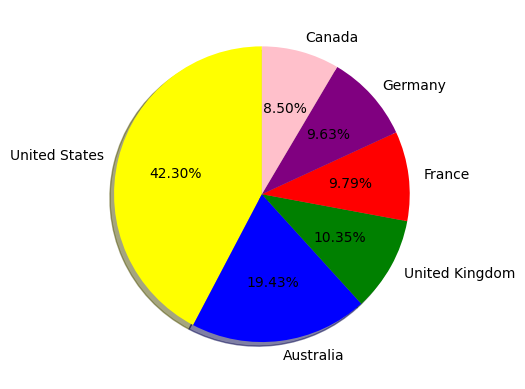

In [11]:
label = Customer_final.EnglishCountryRegionName.value_counts().index
color = ['yellow', 'blue', 'green', 'red', 'purple', 'pink']
value = [7819, 3591 , 1913, 1810, 1780, 1571]


plt.pie(value,labels=label, colors=color, startangle=90, shadow=True, autopct='%1.2f%%')

#### Representation of customer base from different geographical location

<AxesSubplot:xlabel='EnglishOccupation'>

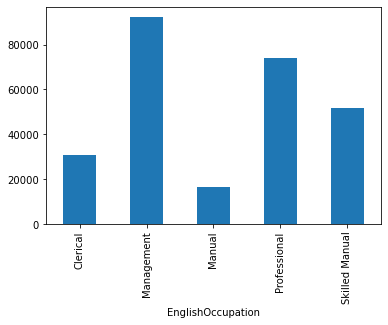

In [14]:
Customer_final.groupby('EnglishOccupation')['YearlyIncome'].mean().plot.bar()

#### Average income as per occupation class.
#### Individuals with 'Management' as occupation earn the highest whereas 'Manual' workers earn the lowest. 

<AxesSubplot:xlabel='EnglishEducation'>

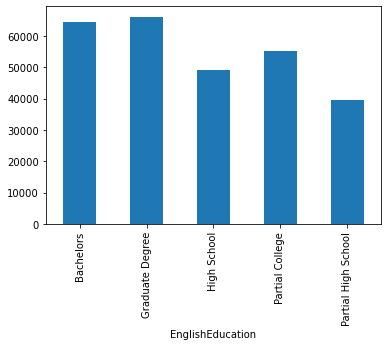

In [15]:
Customer_final.groupby('EnglishEducation')['YearlyIncome'].mean().plot.bar()

#### Average income as per education.
#### Individuals with "Graduate Degree" earn the highest opposed to "Partial High School" who earn the lowest.

In [16]:
Customer_final.groupby('HouseOwnerFlag').sum().reset_index()

,HouseOwnerFlag,CustomerKey,GeographyKey,NameStyle,YearlyIncome,TotalChildren,NumberChildrenAtHome,NumberCarsOwned
0,0,126841388,1452779,0,330040000,8443,4284,9560
1,1,247302498,3315285,0,729200000,25648,14275,18216


D:\Users\Youdeep Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HouseOwnerFlag', ylabel='count'>

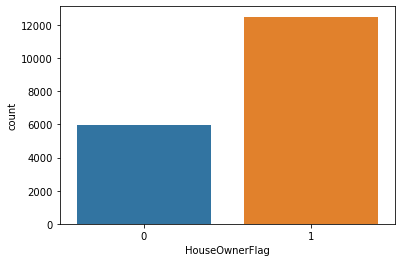

In [17]:
sns.countplot(Customer_final['HouseOwnerFlag'])

#### Count of Houseowners, 1 represents home-owners and 0 represents not a home-owner

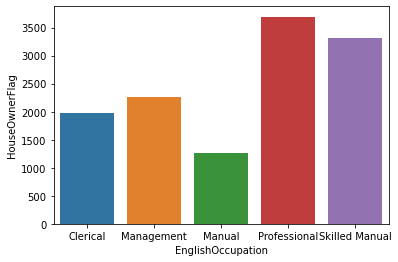

In [18]:
chart_1 = Customer_final.groupby('EnglishOccupation').sum().reset_index();
sns.barplot(x='EnglishOccupation', y='HouseOwnerFlag', data=chart_1);

#### Count of House-owners as per occupation

[Text(0, 0, 'Bachelors'),
 Text(1, 0, 'Graduate Degree'),
 Text(2, 0, 'High School'),
 Text(3, 0, 'Partial College'),
 Text(4, 0, 'Partial High School')]

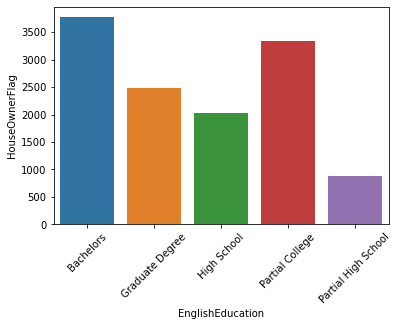

In [19]:
chart_0 = Customer_final.groupby('EnglishEducation').sum().reset_index();
chart_3 = sns.barplot(x='EnglishEducation', y='HouseOwnerFlag', data=chart_0)
chart_3.set_xticklabels(chart_3.get_xticklabels(), rotation=45)


#### Count of Home-owners as per education

D:\Users\Youdeep Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '10000'),
 Text(1, 0, '20000'),
 Text(2, 0, '30000'),
 Text(3, 0, '40000'),
 Text(4, 0, '50000'),
 Text(5, 0, '60000'),
 Text(6, 0, '70000'),
 Text(7, 0, '80000'),
 Text(8, 0, '90000'),
 Text(9, 0, '100000'),
 Text(10, 0, '110000'),
 Text(11, 0, '120000'),
 Text(12, 0, '130000'),
 Text(13, 0, '150000'),
 Text(14, 0, '160000'),
 Text(15, 0, '170000')]

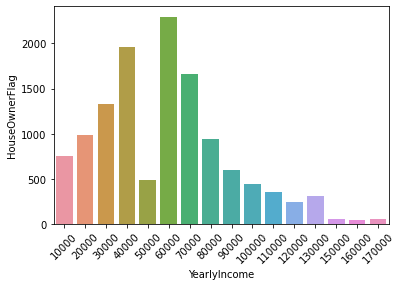

In [20]:
chart_2 = Customer_final.groupby('YearlyIncome').sum().reset_index();
chart = sns.barplot('YearlyIncome', 'HouseOwnerFlag', data = chart_2)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

#### Number of house-owners as per Income

In [21]:
Customer_final.nunique()

CustomerKey                 18484
GeographyKey                  336
CustomerAlternateKey        18484
Title                           5
FirstName                     670
MiddleName                     44
LastName                      375
NameStyle                       1
BirthDate                    8252
MaritalStatus                   2
Suffix                          1
Gender                          2
EmailAddress                18484
YearlyIncome                   16
TotalChildren                   6
NumberChildrenAtHome            6
EnglishEducation                5
SpanishEducation                5
FrenchEducation                 5
EnglishOccupation               5
SpanishOccupation               5
FrenchOccupation                5
HouseOwnerFlag                  2
NumberCarsOwned                 5
AddressLine1                12802
AddressLine2                  166
Phone                        8890
DateFirstPurchase            1124
CommuteDistance                 5
EnglishCountry

#### Dropping features which have too many null values, foreign keys, primary key and features which do not contain categorical or numerical values. 

In [16]:
df_final = Customer_final.drop(['CustomerKey','GeographyKey', 'CustomerAlternateKey', 'Title', 'FirstName',
                    'MiddleName', 'LastName', 'NameStyle', 'EmailAddress', 'SpanishEducation',
                    'FrenchEducation', 'SpanishOccupation', 'FrenchOccupation',
                    'AddressLine1', 'AddressLine2', 'Phone', 'DateFirstPurchase', 'BirthDate', 'Suffix'], axis = 1)

In [23]:
df_final.columns

Index(['MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren',
       'NumberChildrenAtHome', 'EnglishEducation', 'EnglishOccupation',
       'HouseOwnerFlag', 'NumberCarsOwned', 'CommuteDistance',
       'EnglishCountryRegionName'],
      dtype='object')

In [24]:
df_final.isnull().sum()

MaritalStatus               0
Gender                      0
YearlyIncome                0
TotalChildren               0
NumberChildrenAtHome        0
EnglishEducation            0
EnglishOccupation           0
HouseOwnerFlag              0
NumberCarsOwned             0
CommuteDistance             0
EnglishCountryRegionName    0
dtype: int64

In [25]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18484 entries, 0 to 18483
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   MaritalStatus             18484 non-null  object
 1   Gender                    18484 non-null  object
 2   YearlyIncome              18484 non-null  int64 
 3   TotalChildren             18484 non-null  int64 
 4   NumberChildrenAtHome      18484 non-null  int64 
 5   EnglishEducation          18484 non-null  object
 6   EnglishOccupation         18484 non-null  object
 7   HouseOwnerFlag            18484 non-null  int64 
 8   NumberCarsOwned           18484 non-null  int64 
 9   CommuteDistance           18484 non-null  object
 10  EnglishCountryRegionName  18484 non-null  object
dtypes: int64(5), object(6)
memory usage: 1.7+ MB


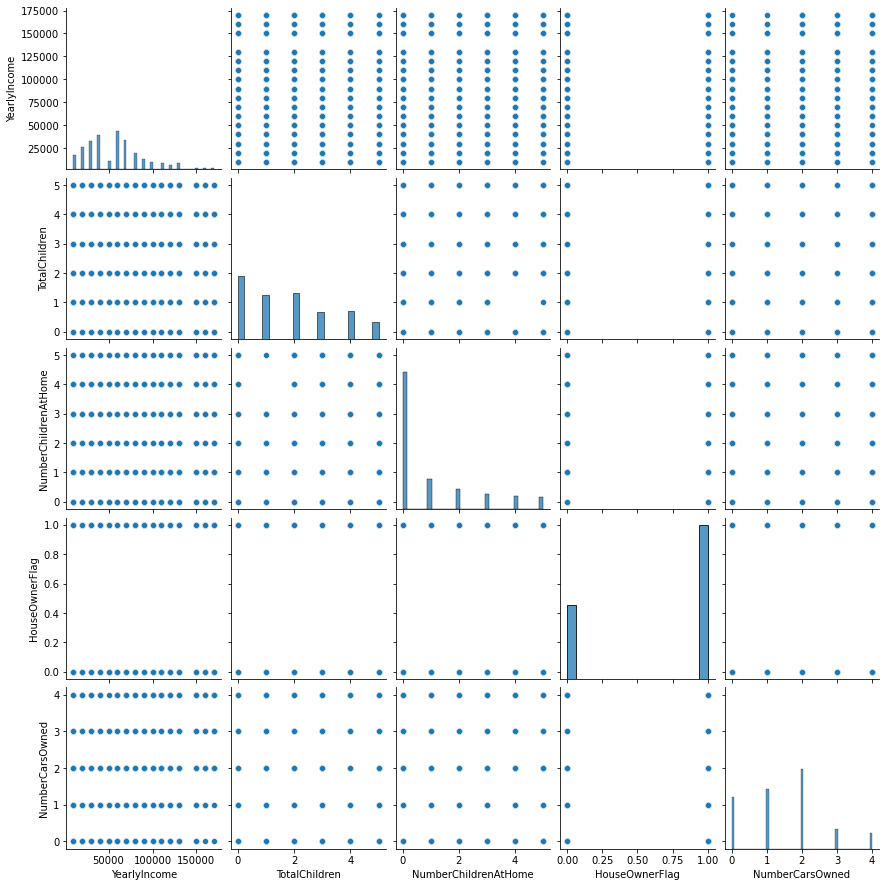

In [26]:
sns.pairplot(df_final)

## Automated Report on Selected features

In [14]:
import pandas_profiling as pp
from pandas_profiling import ProfileReport

c:\Users\Youdeep Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Youdeep Singh\AppData\Local\Temp\ipykernel_25916\2456717678.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [17]:
report = ProfileReport(df_final, title = 'Report')

In [18]:
report.to_file('Customer_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 143.25it/s]


In [21]:
report.to_notebook_iframe()

# Prepare Data for Model

In [31]:
df_final.head()

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,EnglishCountryRegionName
0,M,M,90000,2,0,Bachelors,Professional,1,0,1-2 Miles,Australia
1,S,M,60000,3,3,Bachelors,Professional,0,1,0-1 Miles,Australia
2,M,M,60000,3,3,Bachelors,Professional,1,1,2-5 Miles,Australia
3,S,F,70000,0,0,Bachelors,Professional,0,1,5-10 Miles,Australia
4,S,F,80000,5,5,Bachelors,Professional,1,4,1-2 Miles,Australia


In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18484 entries, 0 to 18483
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   MaritalStatus             18484 non-null  object
 1   Gender                    18484 non-null  object
 2   YearlyIncome              18484 non-null  int64 
 3   TotalChildren             18484 non-null  int64 
 4   NumberChildrenAtHome      18484 non-null  int64 
 5   EnglishEducation          18484 non-null  object
 6   EnglishOccupation         18484 non-null  object
 7   HouseOwnerFlag            18484 non-null  int64 
 8   NumberCarsOwned           18484 non-null  int64 
 9   CommuteDistance           18484 non-null  object
 10  EnglishCountryRegionName  18484 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.2+ MB


#### Converting object data type into integers for machine model, below are two features with their respective rank according to income levels

In [33]:
df_final['EnglishEducation']=df_final['EnglishEducation'].map({'Partial High School':1,'High School':2,
                                     'Partial College':3,'Bachelors':4,'Graduate Degree':5})

In [34]:
df_final['EnglishOccupation']=df_final['EnglishOccupation'].map({'Manual':1,'Clerical':2, 'Skilled Manual':3,
                                                     'Management':4,'Professional':5})

In [35]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

#### Converting remaining features into integers

In [36]:
df_final['YearlyIncome']=labelencoder.fit_transform(df_final['YearlyIncome'])
df_final['Gender']=labelencoder.fit_transform(df_final['Gender'])
df_final['MaritalStatus']=labelencoder.fit_transform(df_final['MaritalStatus'])

In [37]:
df_final.head()

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,EnglishCountryRegionName
0,0,1,8,2,0,4,5,1,0,1-2 Miles,Australia
1,1,1,5,3,3,4,5,0,1,0-1 Miles,Australia
2,0,1,5,3,3,4,5,1,1,2-5 Miles,Australia
3,1,0,6,0,0,4,5,0,1,5-10 Miles,Australia
4,1,0,7,5,5,4,5,1,4,1-2 Miles,Australia


In [38]:
commute_distance = pd.get_dummies(df_final['CommuteDistance'], drop_first=True)
commute_distance.head()

,1-2 Miles,10+ Miles,2-5 Miles,5-10 Miles
0,1,0,0,0
1,0,0,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [39]:
country_region = pd.get_dummies(df_final['EnglishCountryRegionName'], drop_first=True)
country_region.head()

,Canada,France,Germany,United Kingdom,United States
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [40]:
df_final = pd.concat([df_final,commute_distance,country_region], axis=1)

In [41]:
df_final.drop(['CommuteDistance', 'EnglishCountryRegionName'], axis = 1, inplace=True)

#### Final data-set for machine model

In [42]:
df_final.head()

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,1-2 Miles,10+ Miles,2-5 Miles,5-10 Miles,Canada,France,Germany,United Kingdom,United States
0,0,1,8,2,0,4,5,1,0,1,0,0,0,0,0,0,0,0
1,1,1,5,3,3,4,5,0,1,0,0,0,0,0,0,0,0,0
2,0,1,5,3,3,4,5,1,1,0,0,1,0,0,0,0,0,0
3,1,0,6,0,0,4,5,0,1,0,0,0,1,0,0,0,0,0
4,1,0,7,5,5,4,5,1,4,1,0,0,0,0,0,0,0,0


In [43]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18484 entries, 0 to 18483
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   MaritalStatus         18484 non-null  int32
 1   Gender                18484 non-null  int32
 2   YearlyIncome          18484 non-null  int64
 3   TotalChildren         18484 non-null  int64
 4   NumberChildrenAtHome  18484 non-null  int64
 5   EnglishEducation      18484 non-null  int64
 6   EnglishOccupation     18484 non-null  int64
 7   HouseOwnerFlag        18484 non-null  int64
 8   NumberCarsOwned       18484 non-null  int64
 9   1-2 Miles             18484 non-null  uint8
 10  10+ Miles             18484 non-null  uint8
 11  2-5 Miles             18484 non-null  uint8
 12  5-10 Miles            18484 non-null  uint8
 13  Canada                18484 non-null  uint8
 14  France                18484 non-null  uint8
 15  Germany               18484 non-null  uint8
 16  Unit

## Split and Train Data

In [44]:
X = df_final.drop('HouseOwnerFlag', axis=1)
y = df_final['HouseOwnerFlag']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 1) 

In [46]:
X_train.shape

(14787, 17)

In [47]:
X_test.shape

(3697, 17)

In [48]:
y_train.shape

(14787,)

In [49]:
y_test.shape

(3697,)

#### Using Logistic Regression for classification problem

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [51]:
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [53]:
model.predict_proba(X_test)

array([[0.19595451, 0.80404549],
       [0.83425059, 0.16574941],
       [0.37754234, 0.62245766],
       ...,
       [0.26277974, 0.73722026],
       [0.27635252, 0.72364748],
       [0.06373185, 0.93626815]])

In [54]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

D:\Users\Youdeep Singh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


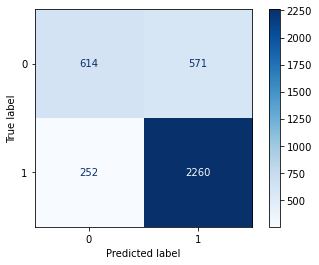

In [55]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

#### 2260 are house-owners have been predicted accurately, while 614 are not house-owners is predicted correct.

In [56]:
accuracy_score(y_test, y_predicted)

0.777387070597782

#### Model accuracy at 77.73%

In [57]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.71      0.52      0.60      1185
           1       0.80      0.90      0.85      2512

    accuracy                           0.78      3697
   macro avg       0.75      0.71      0.72      3697
weighted avg       0.77      0.78      0.77      3697

